In [18]:
import pandas as pd
import io
import numpy as np
from scipy import stats

In [19]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [20]:
null_counts = df.isnull().sum().sort_values(ascending=False)
null_counts = null_counts[null_counts>0]
null_counts

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2939 non-null   object 
 1   Year                             2939 non-null   int64  
 2   Status                           2939 non-null   object 
 3   Life expectancy                  2929 non-null   float64
 4   Adult Mortality                  2929 non-null   float64
 5   infant deaths                    2939 non-null   int64  
 6   Alcohol                          2745 non-null   float64
 7   percentage expenditure           2939 non-null   float64
 8   Hepatitis B                      2386 non-null   float64
 9   Measles                          2939 non-null   int64  
 10   BMI                             2905 non-null   float64
 11  under-five deaths                2939 non-null   int64  
 12  Polio               

In [22]:
class MyDataFrame:
    def __init__(self, df):
        self.df = pd.DataFrame(df)
    
    

In [23]:
df = pd.read_csv("Life Expectancy Data.csv")
my_df = MyDataFrame(df)

my_df

In [24]:
null_counts = df.isnull().sum().sort_values(ascending=False)
null_counts = null_counts[null_counts>0]

In [25]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [26]:
df = df.fillna(df.median(numeric_only =True))

In [27]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [28]:
df.mode(numeric_only =True)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2013,73.0,12.0,0,0.01,0.0,92.0,0,43.5,0,99.0,5.76,99.0,0.1,1764.97387,1388115.0,1.0,3.3,0.677,12.3


In [29]:
dfCoffe = pd.read_csv('coffee.csv')
dfCoffe.isna().sum()

Region              0
Place name          0
Place type          0
Rating              2
Reviews             2
Price               0
Delivery option     0
Dine in option     60
Takeout option     56
dtype: int64

In [30]:
dfCoffe['Rating'].dtypes == 'float'

True

In [31]:
object_columns = dfCoffe.select_dtypes(include=['object'])

In [32]:
for column in dfCoffe.select_dtypes(include=['object']):
    dfCoffe[column].fillna(dfCoffe[column].mode()[0], inplace=True)

In [ ]:
def drop_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   outliers_dropped = outliers.dropna()

   return outliers_dropped

In [53]:
len(df)

2939

<AxesSubplot: ylabel='Population'>

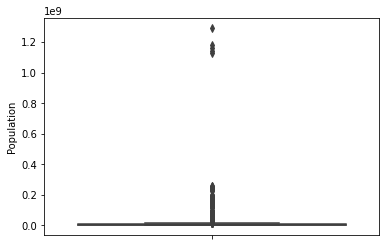

In [102]:
import seaborn as sns
df = pd.read_csv("Life Expectancy Data.csv")
sns.boxplot(data=df,y='Population')

In [103]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)].reset_index(drop=True)
    return df_out

In [104]:
df_outlier = remove_outlier(df,'Population')

<AxesSubplot: ylabel='Population'>

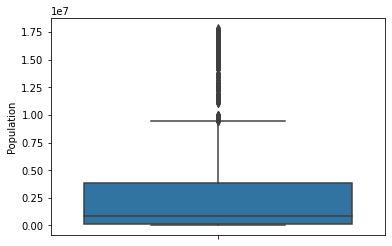

In [105]:
import seaborn as sns
sns.boxplot(data=df_outlier,y='Population')

In [72]:
# Remove rows with outliers using iloc
df_clean = df.drop(df_clean.index,axis=0).reset_index(drop=True)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Angola,2015,Developing,52.4,335.0,NaN,3.75,0.000000,NaN,NaN,...,NaN,5.76,NaN,NaN,3695.793748,2785935.0,8.3,8.2,0.531,11.4
1,Angola,2014,Developing,51.7,348.0,NaN,8.33,23.965612,NaN,NaN,...,NaN,3.31,NaN,NaN,479.312240,2692466.0,8.5,8.3,0.527,11.4
2,Angola,2013,Developing,51.1,355.0,NaN,8.10,35.958573,NaN,NaN,...,NaN,4.26,77.0,NaN,484.616884,2599834.0,8.6,8.5,0.523,11.4
3,Angola,2012,Developing,56.0,358.0,NaN,8.24,256.122524,NaN,NaN,...,75.0,3.30,75.0,NaN,NaN,259615.0,8.8,8.6,0.508,10.3
4,Angola,2011,Developing,51.0,361.0,NaN,8.06,239.891392,NaN,NaN,...,73.0,3.38,NaN,NaN,NaN,NaN,8.9,8.8,0.495,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,Zimbabwe,2003,Developing,NaN,NaN,NaN,4.06,0.000000,NaN,NaN,...,NaN,6.52,NaN,NaN,453.351155,NaN,9.8,9.9,0.418,9.5
2887,Zimbabwe,2002,Developing,44.8,73.0,NaN,4.43,0.000000,NaN,NaN,...,73.0,6.53,NaN,NaN,57.348340,125525.0,1.2,1.3,0.427,10.0
2888,Zimbabwe,2001,Developing,45.3,NaN,NaN,1.72,0.000000,NaN,NaN,...,76.0,6.16,75.0,NaN,548.587312,NaN,1.6,1.7,0.427,9.8
2889,Zimbabwe,2000,Developing,46.0,NaN,NaN,1.68,0.000000,NaN,NaN,...,78.0,7.10,78.0,NaN,547.358878,NaN,11.0,11.2,0.434,9.8


In [120]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
labelencoder = LabelEncoder()
df = df.apply(lambda x: labelencoder.fit_transform(x))

In [136]:
df = pd.read_csv("Life Expectancy Data.csv")
columns = df.columns

In [137]:

labelencoder = LabelEncoder()
df = df.apply(lambda x: labelencoder.fit_transform(x))

In [138]:



scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)

In [150]:
abc = df.isna().any().any()
abc

False

In [148]:
a = abc.isna() == 'True'
a

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2937,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [135]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.0,1.000000,1.0,0.516575,0.512941,0.298077,0.000000,0.385905,0.632184,0.485893,...,0.041096,0.721271,0.604938,0.000000,0.296386,0.922300,0.775,0.768116,0.2784,0.416185
1,0.0,0.933333,1.0,0.400552,0.527059,0.307692,0.000000,0.391491,0.597701,0.330199,...,0.479452,0.723716,0.567901,0.000000,0.301205,0.294557,0.790,0.777778,0.2736,0.410405
2,0.0,0.866667,1.0,0.400552,0.522353,0.317308,0.000000,0.390632,0.620690,0.304075,...,0.520548,0.718826,0.592593,0.000000,0.308434,0.916594,0.800,0.787440,0.2672,0.404624
3,0.0,0.800000,1.0,0.389503,0.529412,0.331731,0.000000,0.400945,0.655172,0.652038,...,0.589041,0.764059,0.629630,0.000000,0.320482,0.641791,0.810,0.797101,0.2560,0.398844
4,0.0,0.733333,1.0,0.381215,0.536471,0.341346,0.000000,0.075204,0.666667,0.668757,...,0.602740,0.698044,0.641975,0.000000,0.047390,0.612379,0.825,0.806763,0.2416,0.381503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934,1.0,0.200000,1.0,0.030387,0.992941,0.125000,0.346654,0.000000,0.057471,0.459770,...,0.054795,0.550122,0.641975,0.929648,0.242972,0.818262,0.485,0.473430,0.1840,0.381503
2935,1.0,0.133333,1.0,0.035912,0.152941,0.120192,0.377323,0.000000,0.712644,0.243469,...,0.657534,0.551345,0.666667,0.944724,0.044177,0.193591,0.055,0.057971,0.1984,0.410405
2936,1.0,0.066667,1.0,0.041436,0.985882,0.120192,0.151487,0.000000,0.747126,0.340648,...,0.698630,0.506112,0.716049,0.959799,0.283534,0.816067,0.075,0.077295,0.1984,0.398844
2937,1.0,0.000000,1.0,0.058011,0.974118,0.115385,0.147770,0.000000,0.781609,0.547544,...,0.726027,0.610024,0.753086,0.964824,0.282731,0.814750,0.495,0.487923,0.2096,0.398844


In [119]:


df = df.apply(lambda x: scaler.fit_transform(x).reshape(-1,1))

ValueError: Expected 2D array, got 1D array instead:
array=[  0.   0.   0. ... 192. 192. 192.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.